# Baseball Case Study

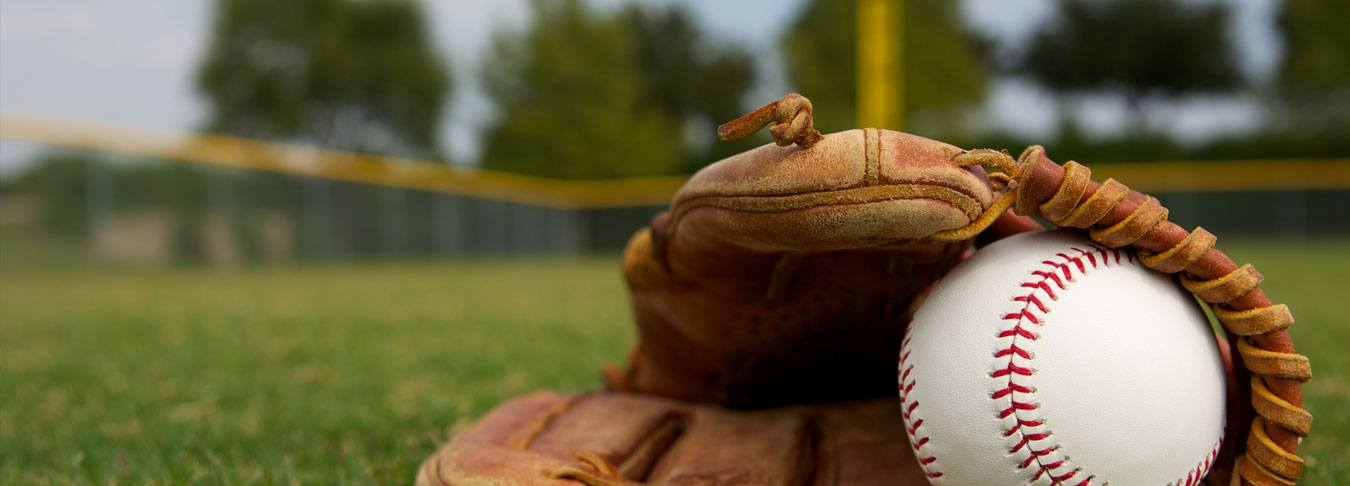

Dataset  

    This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


Input features

    1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
    2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
    3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
    4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
    5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
    6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
    7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
    8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
    9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
    10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
    11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
    12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
    13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
    14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
    15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
    16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
    17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

Output label  

    Number of predicted wins (W)

Aim: 
 
    Develop a machine learning model to predict the number of wins in a basketball match based on different features (Regression model)

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data

bb_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
bb_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Data pre-processing & EDA

In [4]:
# create a copy of the dataset for analysis

bb_df1=bb_df.copy()

In [5]:
bb_df1.shape

(30, 17)

In [6]:
bb_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
bb_df1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation:  

    There are 30 records in the dataset  
    There are no nulls observed in the dataset  
    Out of 17 columns, 16 have int64 and 1 has float64 datatype

In [8]:
bb_df1.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation:  

    The number of wins ranged from 63 to 100  
    Mean number of wins = 80.96 and median number of wins = 81.00  
    Mean of all the features are near the median value, indicating that data distribution is approximately symmetrical  

In [9]:
# check number of unique values in each column

unique=bb_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [10]:
# take the count of each unique value in each column

for i in bb_df1.columns:
    print(bb_df1.value_counts(bb_df1[i]),'\n')

W
68     3
74     2
76     2
81     2
83     2
63     1
87     1
98     1
97     1
95     1
93     1
92     1
90     1
88     1
84     1
86     1
85     1
64     1
80     1
79     1
78     1
71     1
67     1
100    1
Name: count, dtype: int64 

R
689    2
696    2
613    1
764    1
751    1
748    1
737    1
729    1
724    1
720    1
713    1
703    1
697    1
694    1
573    1
683    1
669    1
667    1
661    1
656    1
655    1
650    1
647    1
644    1
640    1
626    1
622    1
891    1
Name: count, dtype: int64 

AB
5485    2
5385    1
5527    1
5640    1
5631    1
5605    1
5600    1
5575    1
5572    1
5571    1
5567    1
5565    1
5544    1
5533    1
5529    1
5511    1
5417    1
5509    1
5491    1
5484    1
5480    1
5467    1
5463    1
5459    1
5457    1
5439    1
5428    1
5420    1
5649    1
Name: count, dtype: int64 

H
1363    2
1324    1
1386    1
1497    1
1495    1
1494    1
1486    1
1480    1
1479    1
1462    1
1420    1
1419    1
1405    1
1397    1
1395    1

Observation:  

    68 number of wins is the most common in the dataset  
    689 and 696 runs were common than others
    In 7 instances, the pitcher has completed one full game  
    In 7 instances, 12 shoutouts (SHO) has been recorded where the the pitcher has completed one full game without letting opposite team score any runs  


In [11]:
# check for duplicates

duplicates=bb_df1.duplicated()

print('No. of duplicates in the dataset: ', bb_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', bb_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


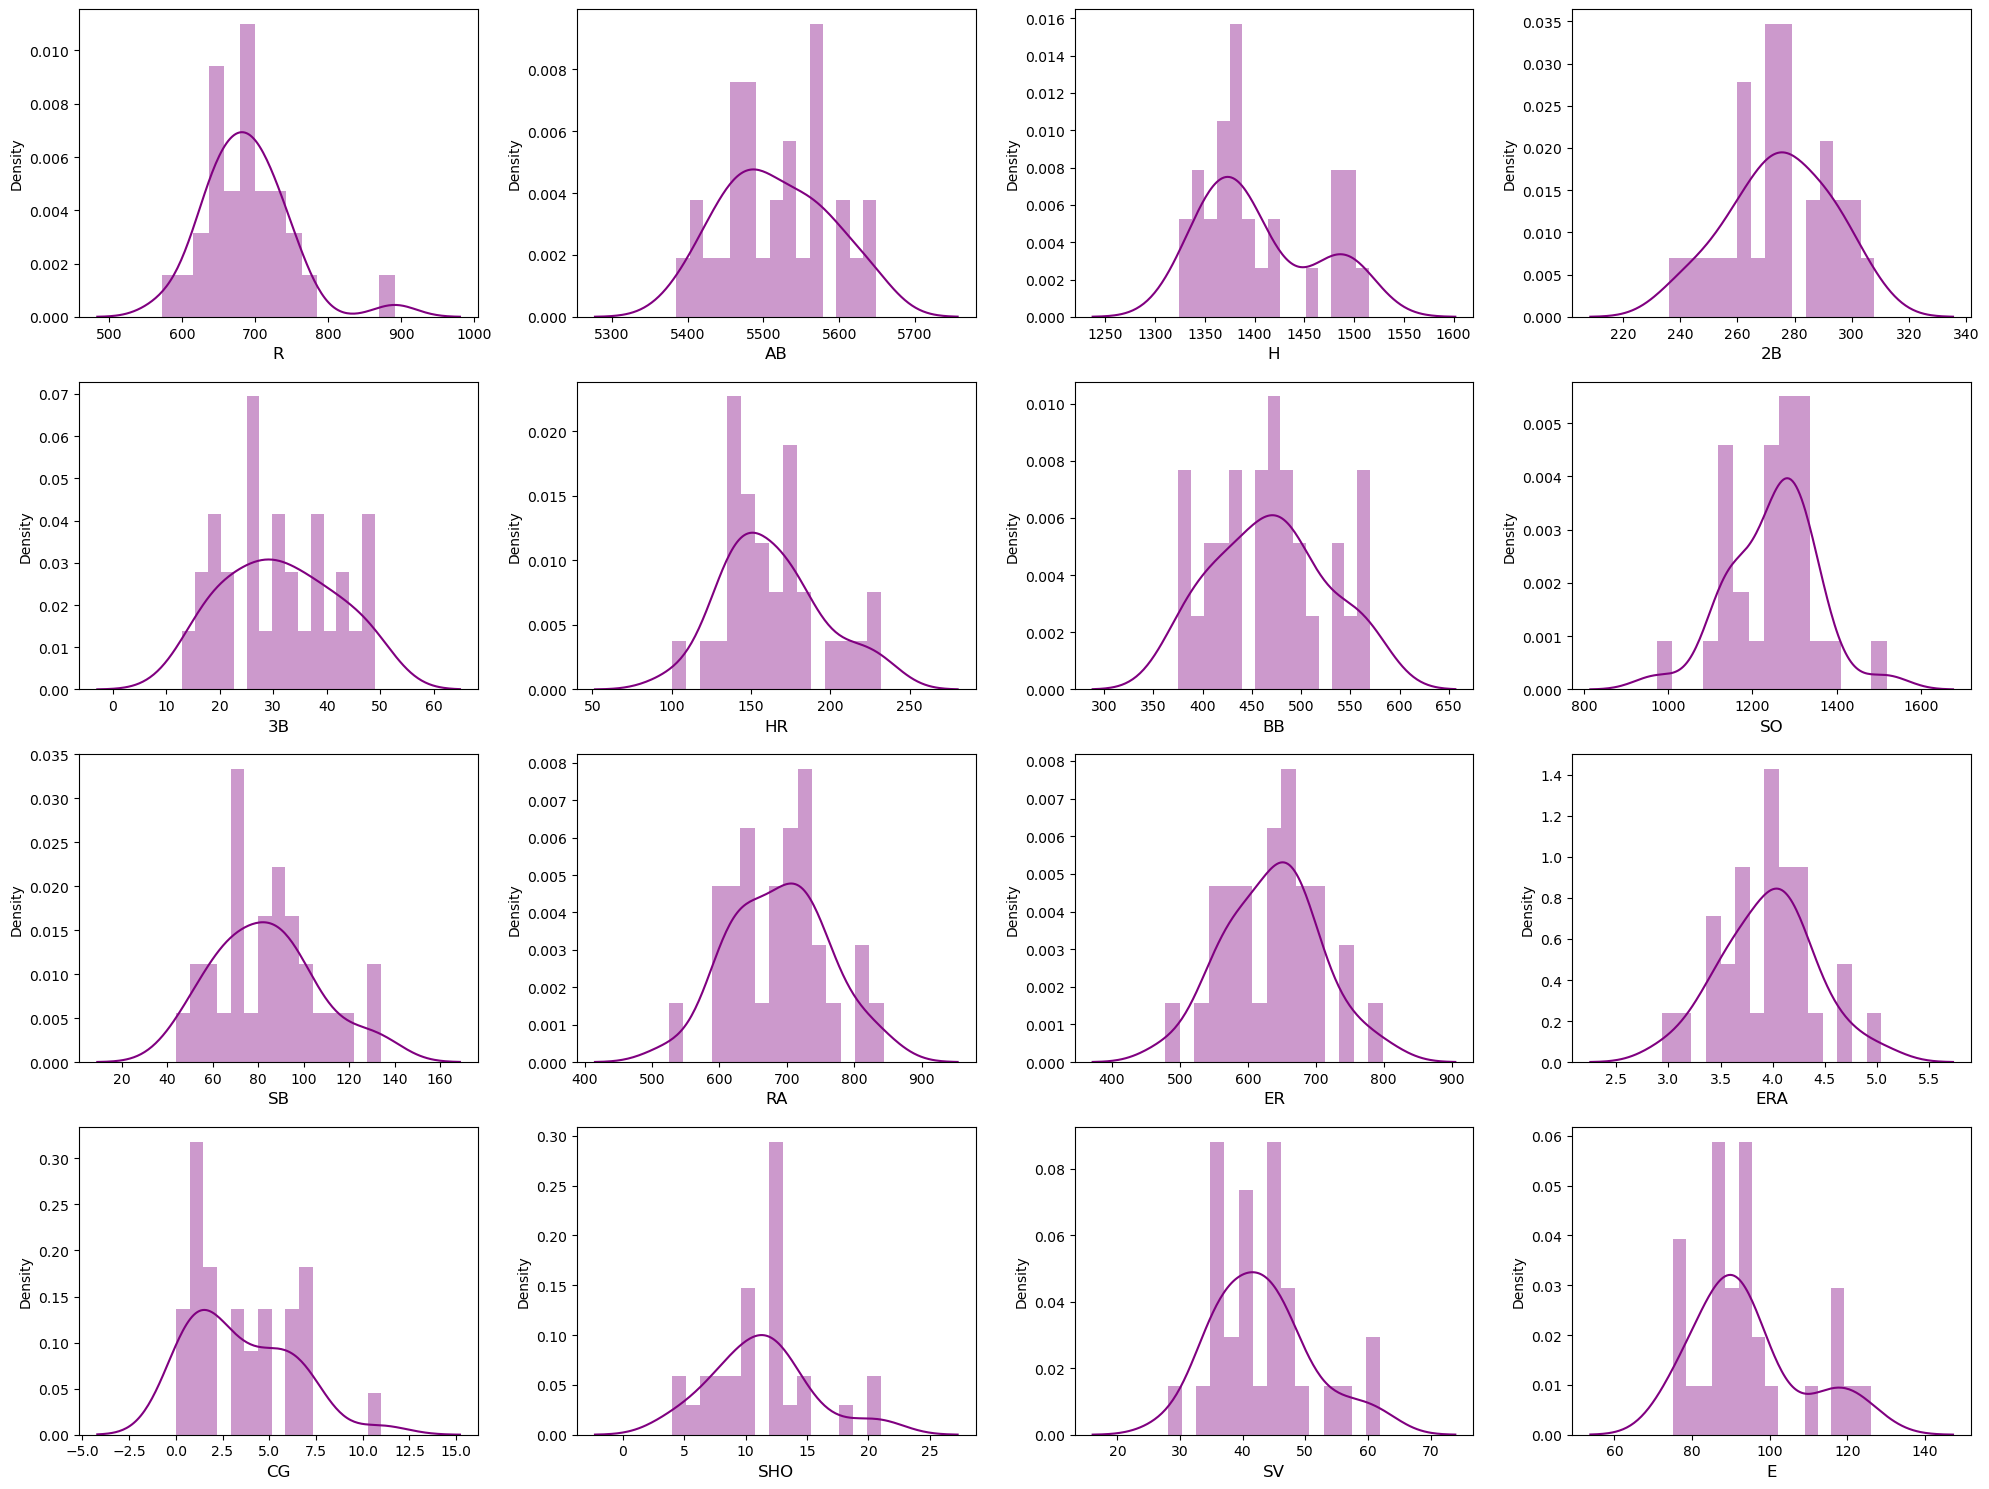

In [12]:
# check data distribution

x=bb_df1.drop('W',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=16:
        ax=plt.subplot(4,4,plot)
        sns.distplot(x[col],bins=15, color='purple')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

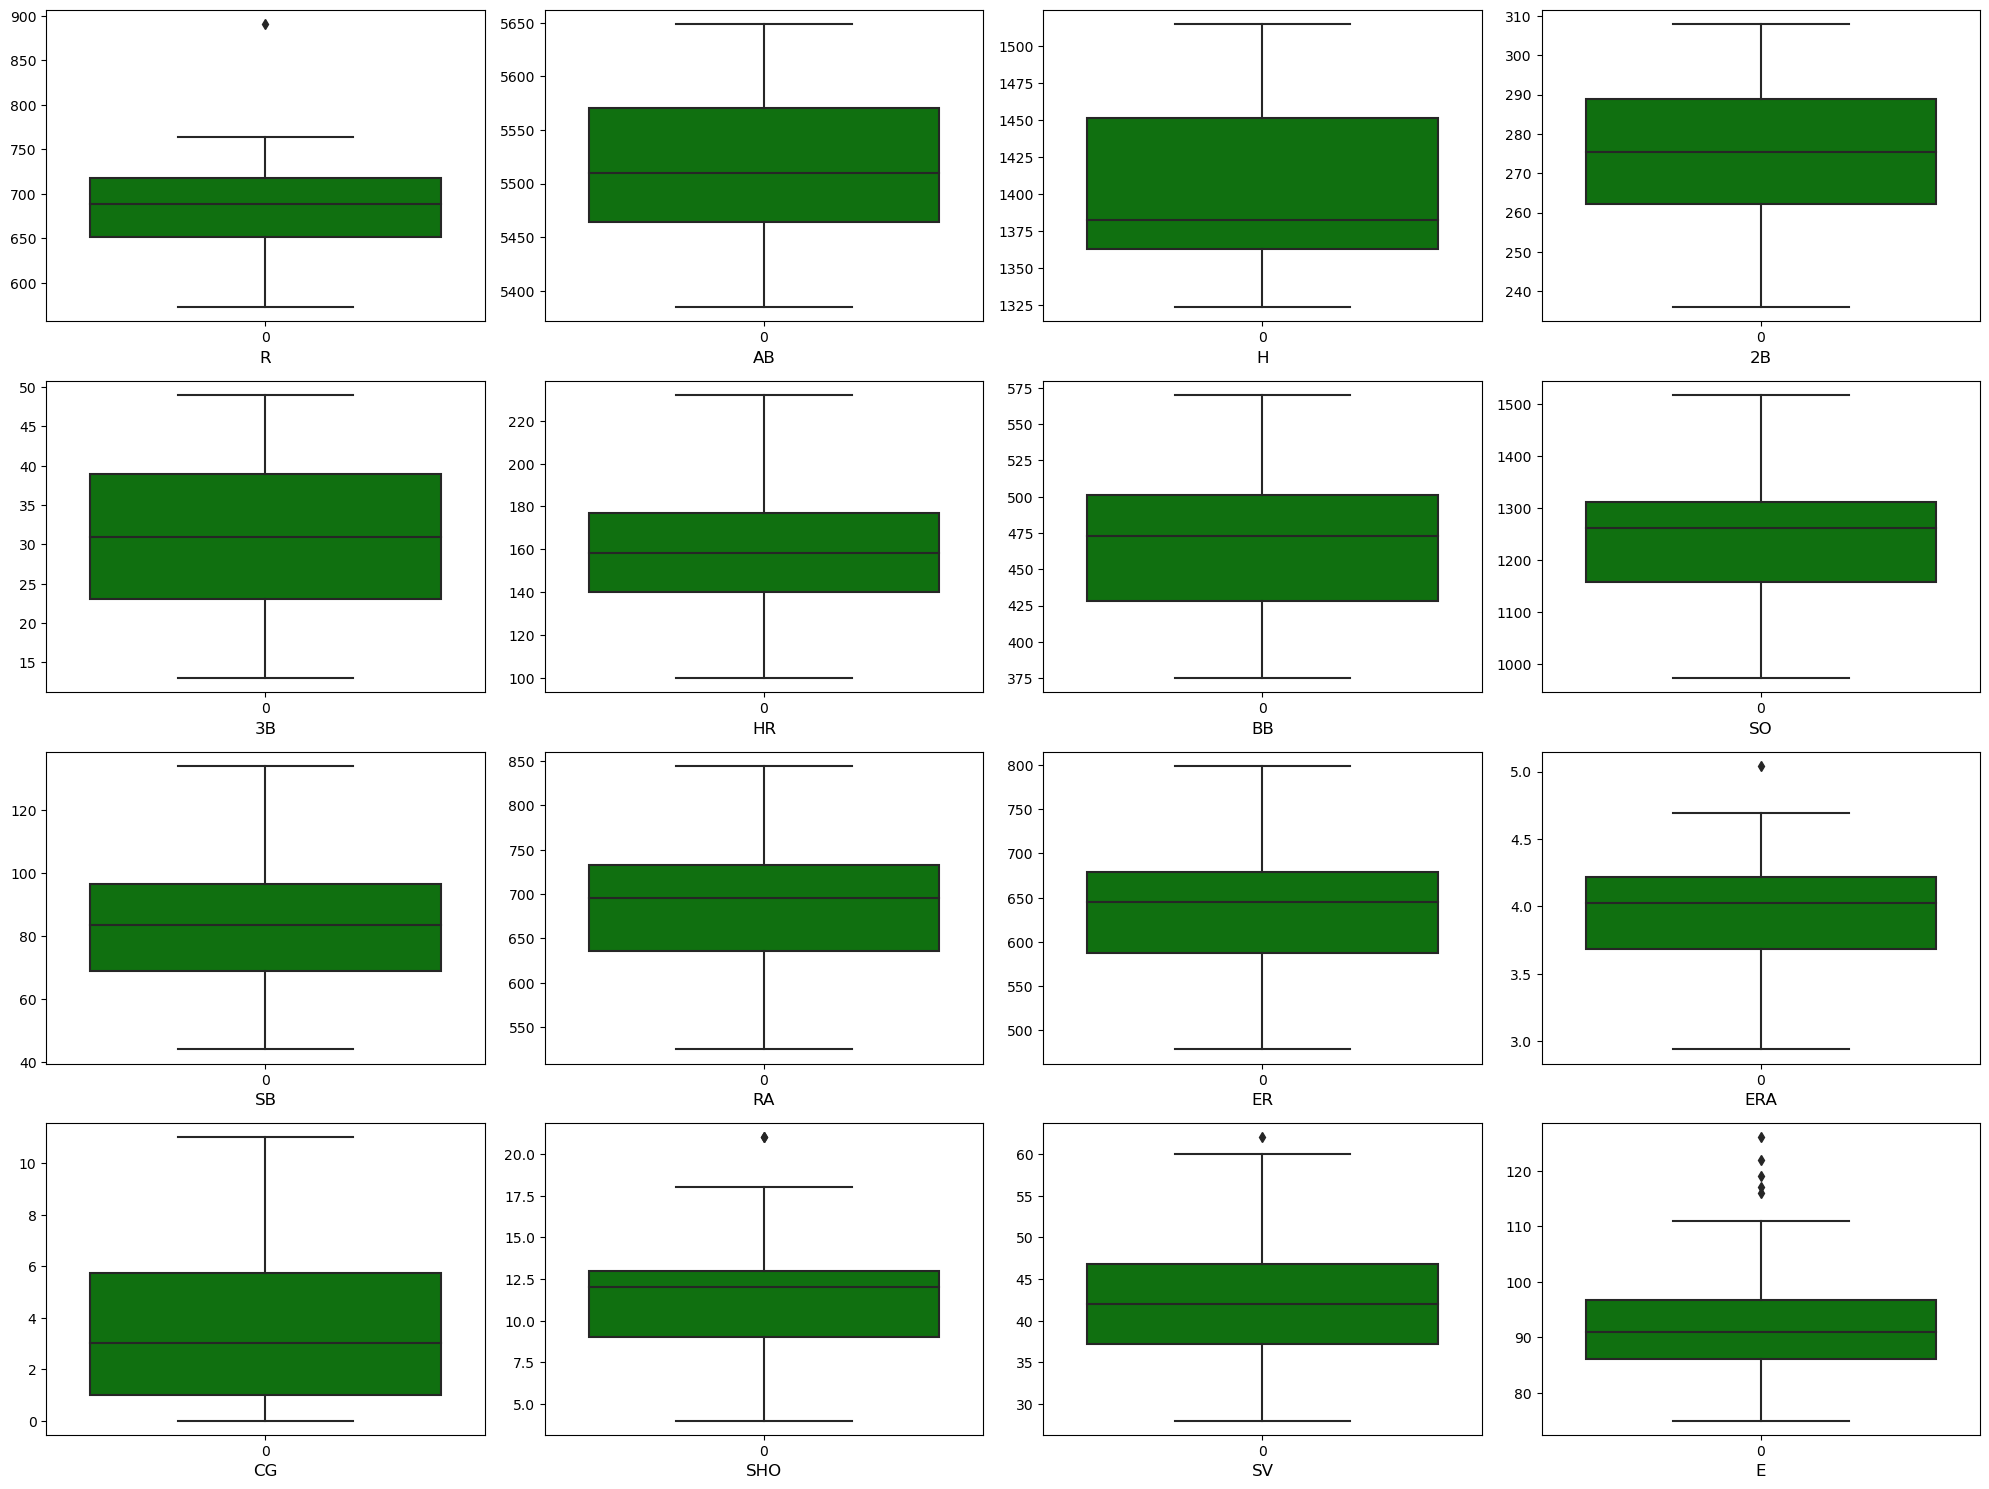

In [13]:
# check outliers

x=bb_df1.drop('W',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=16:
        ax=plt.subplot(4,4,plot)
        sns.boxplot(x[col], color='green')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
Data is normally distributed across all features  
No outliers are observed except for E (Errors column) but outliers aren't removed as the dataset is very small.

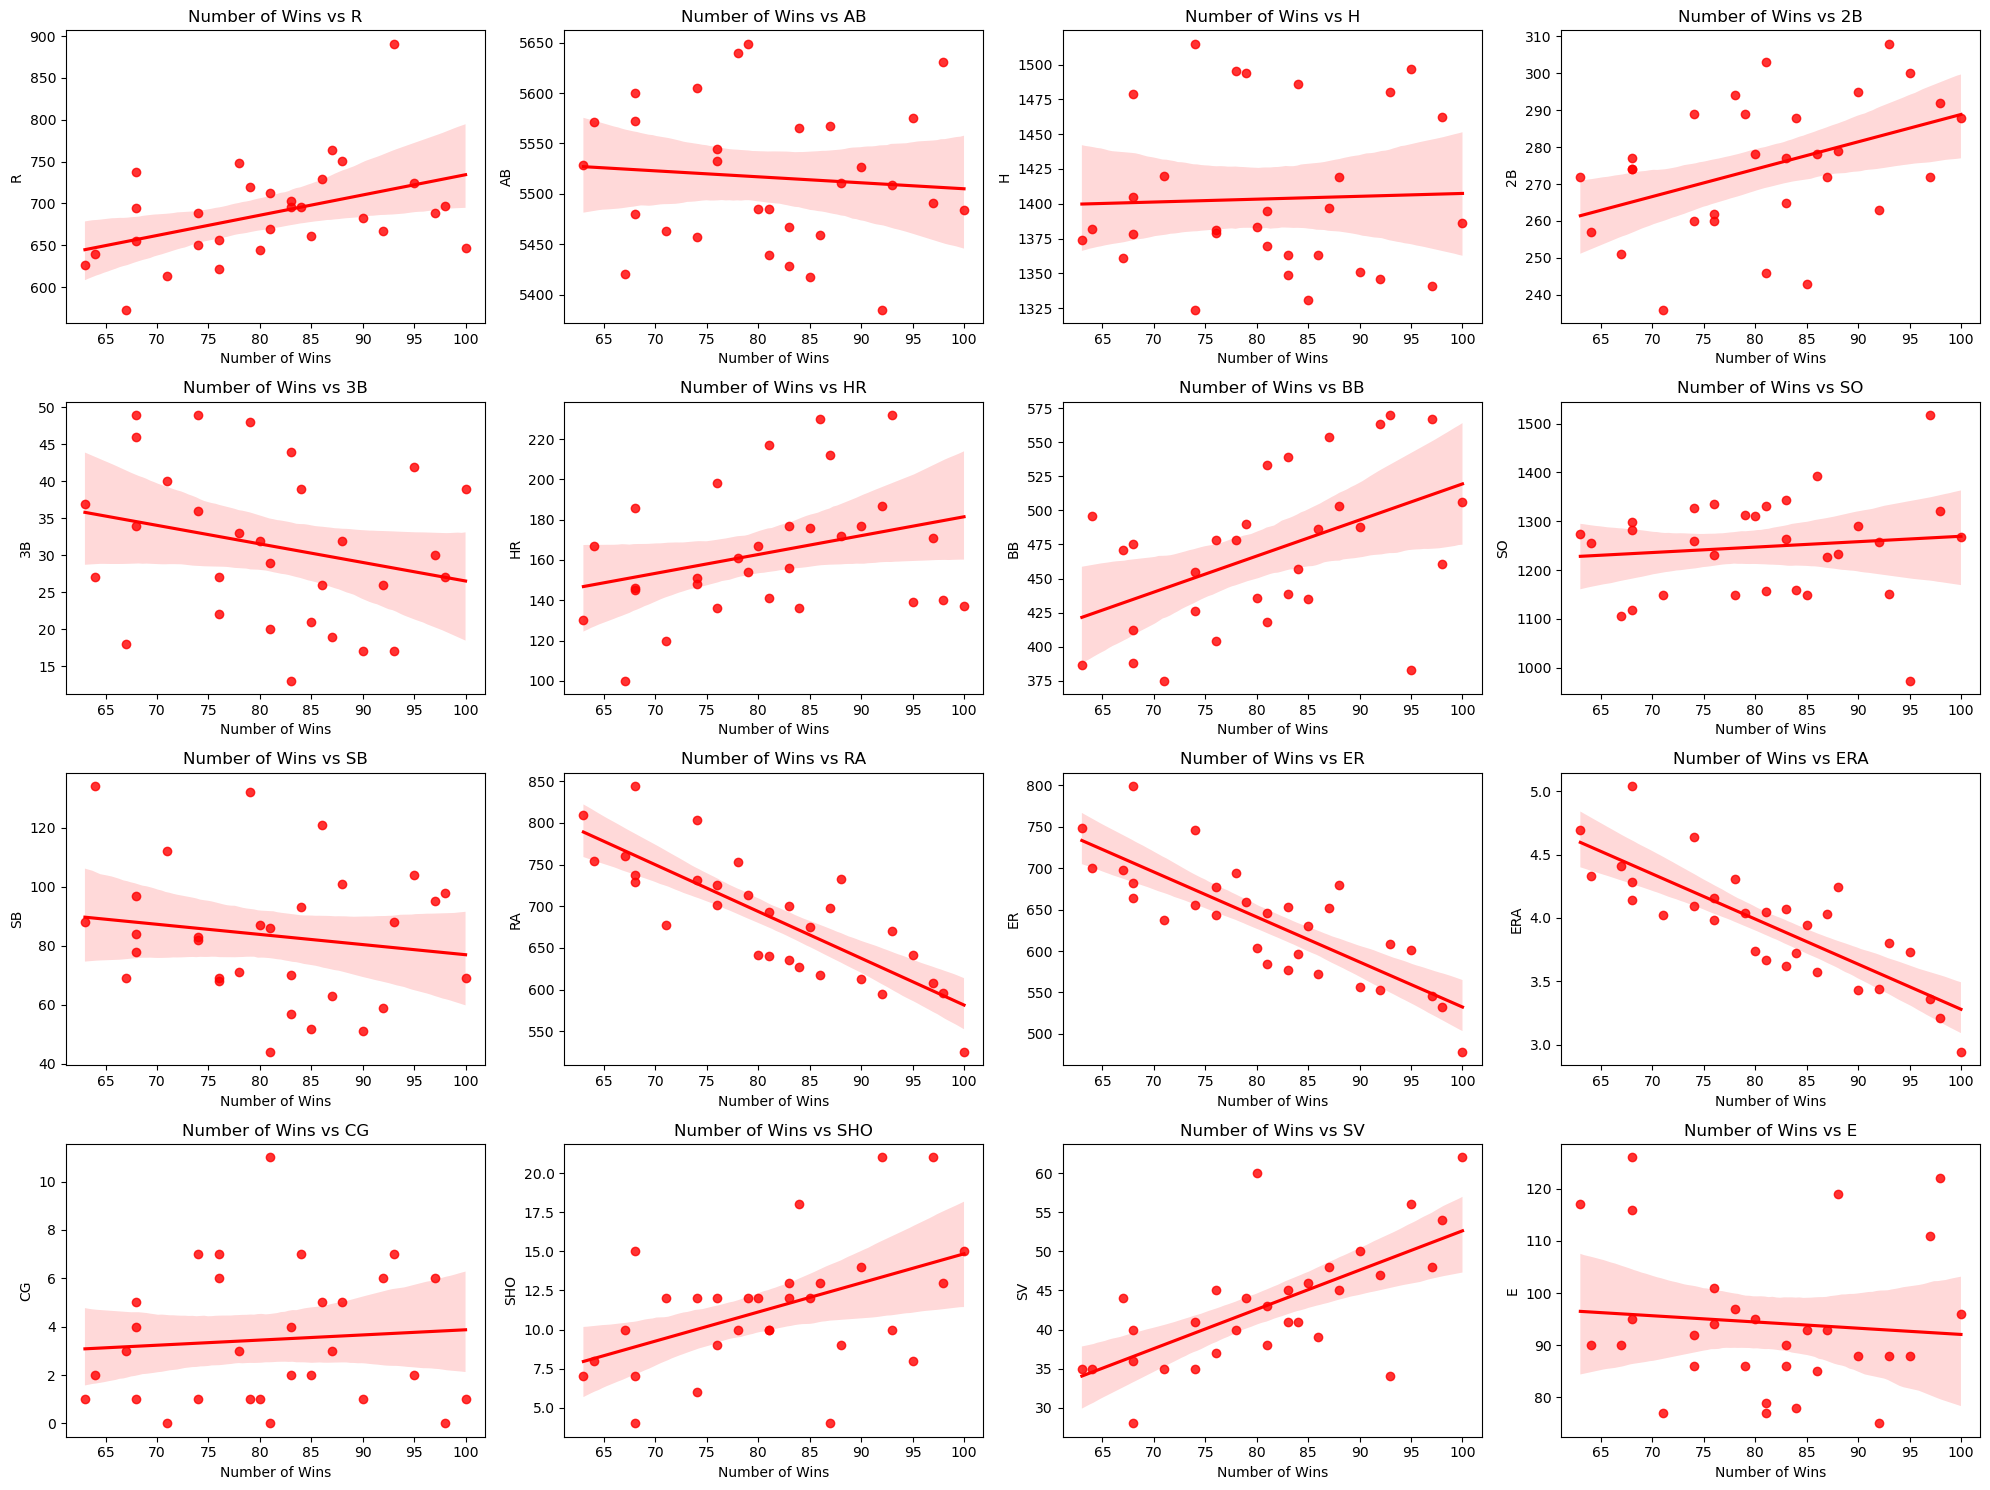

In [14]:
# checking the Number of Wins with other features

x=bb_df1.drop('W',axis=1)
plt.figure(figsize=(20,15))
plot=1
for i in x.columns:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.regplot(x='W',y=i,data=bb_df1, color='red')
        plt.xlabel('Number of Wins')
        plt.ylabel(i)   
        plt.title(f'Number of Wins vs {i}')
        plot+=1
plt.tight_layout()

Observation:  

    Number of Wins seems to be increasing with increase in R, 2B, BB, HR, SHO and SV.  
    Number of Wins seems to be decreasing with increase in RA, 3B, ER, and ERA.  
    AB, H, SO, CG, E and 5B seems to be stable with the increase/decrease in number of wins.

# Feature Selection

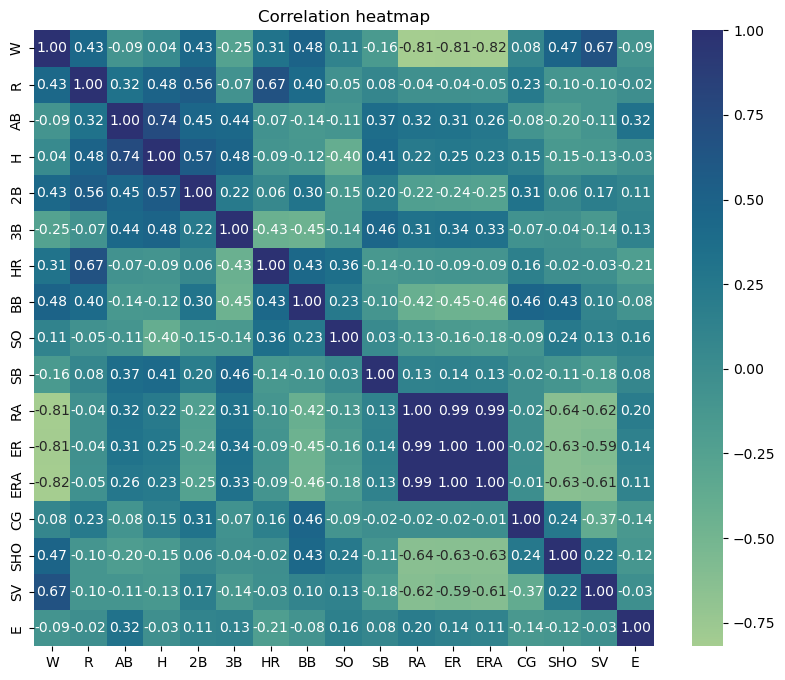

In [15]:
# check for correlation

cm= bb_df1.corr()
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,cmap='crest',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  

    Number of wins has high negative correlation with RA, ER and ERA whereas high positive correlation with SV.  
    Number of wins has moderate positive correlation with SHO, BB, HR, 2B and R.
Highly correlated features are:  

    ER and ERA (strong positive correlation)  
    SHO with ERA, ER and RA (moderate negative correlation)  
    SV with ERA, ER and RA (moderate negative correlation)  

In [63]:
# confirm multicollinearity by vif

x=bb_df1.drop('W',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
10,ER,1680.387145
11,ERA,1222.722240
9,RA,191.839155
1,AB,13.311532
0,R,11.522370
5,HR,10.079902
2,H,10.070668
14,SV,5.798850
3,2B,4.019297
6,BB,3.806098


Observation:  

    High multicollinearity exists for many features. We can remove the top 2 features with maximum VIF score and check the multicollinearity again

In [98]:
bb_df1.drop(['ER','ERA'], axis=1,inplace=True)

In [100]:
# confirm multicollinearity by vif

x=bb_df1.drop('W',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,R,10.791320
2,H,8.568511
5,HR,7.586684
9,RA,5.068366
1,AB,4.369242
3,2B,3.667399
6,BB,3.541589
11,SHO,3.383050
12,SV,3.110481
4,3B,2.998994


Observation:  

    VIF score has been considerably reduced after removal of ER and ERA columns.  
    Other features can be selected for model training

In [158]:
# splitting data into features(x) and label(y)

x=bb_df1.drop(['W'],axis=1)
y=bb_df1['W']

In [159]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(22, 14) (22,) (8, 14) (8,)


# MODEL BUILDING & VALIDATION

In [160]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        cv=cross_val_score(model,x_scaled,y,cv=5).mean()
        print('R2 score: ',r2_score(y_test,y_pred2))


In [161]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.66110075557267


In [162]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7667337108303398


In [163]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.6442517557634364


In [164]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  -0.07536993500207445


In [165]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.4116069146729363


In [166]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
score(abr,x_train,y_train,x_test,y_test,train=True)
score(abr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.3160082361437637


In [167]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor(random_state=55)
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.39460520803871235


In [168]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.361577233682845


In [169]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  -0.37595900805065763


In [170]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)

In [171]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'AdaBoost':abr,
        'Gradient Boosting':gbdt,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Lasso,0.766734,26.355446,3.610593,0.313315,0.453419
0,Linear Regression,0.661101,38.290319,5.540174,0.340374,0.320727
2,Ridge,0.644252,40.193993,5.136987,0.339801,0.304451
4,Random Forest,0.518593,54.391462,6.091250,-0.639243,1.157836
6,Gradient Boosting,0.394605,68.400152,6.817088,-1.601649,1.996254
7,XGBoost,0.361577,72.131797,7.088843,-1.105556,1.467133
5,AdaBoost,0.202168,90.142578,8.046875,-0.825540,1.027708
3,Decision Tree,0.155857,95.375000,8.125000,-2.434978,2.590835
8,SVM,-0.375959,155.461869,10.982496,-0.458793,0.082834


In [174]:
# Hyperparameter tuning of Lasso model

from sklearn.model_selection import RandomizedSearchCV

params = {'alpha':[0.001,0.01,0.1,1,10]}

rs= RandomizedSearchCV(Lasso(),param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for Lasso model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for Lasso model: {'alpha': 1} 
 Best score: 0.3929358729949383


In [194]:
# train and evaluate new lasso model after hyperparameter tuning and manual editing

lasso1=Lasso(alpha= 0.599)
lasso1.fit(x_train,y_train)
score(lasso1,x_train,y_train,x_test,y_test,train=True)
score(lasso1,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8147534255720481


In [195]:
models={'Lasso ':lasso,'Tuned_Lasso ': lasso1}
evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned_Lasso,0.814753,20.929968,3.260465,0.325649,0.489104
0,Lasso,0.766734,26.355446,3.610593,0.313315,0.453419


Observation:  

    Tuned Lasso model (lasso1) is selected as the best model out of all the built models for the regression task.

In [196]:
# save the model
pickle.dump(lasso1, open('Baseball_wins_Prediction_lasso1.pkl','wb'))

In [197]:
# load model and view predicted wins vs actual wins

Baseball_Prediction_model = pickle.load(open('Baseball_wins_Prediction_lasso1.pkl','rb'))
y_pred = Baseball_Prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted wins':y_pred,'Actual wins':y_test})
result.head()

,Predicted wins,Actual wins
0,89.786136,95
26,85.494032,84
17,88.607973,97
24,63.647733,63
11,86.008700,86


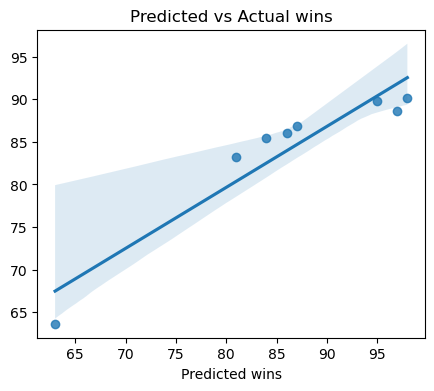

In [199]:
# plot Predicted vs Actual CGPA

plt.figure(figsize=(5,4))
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual wins')
plt.xlabel('Actual wins')
plt.xlabel('Predicted wins')
plt.show()

Observation:  

    Tuned Lasso model was able to predict the wins closer to the actual wins.  
    Datapoints are spread outside closer to the regression line in the regplot.  The spread may be due to the less number of train and test data used for the project.

# Overall Summary

The dataset on "Baseball Case Study" was used to analyse and build machine learning models to predict number of wins for a given team based on different indicators of success.

# Data Insights

* Most common runs scored in the game were 689 and 696.  
* In 7 instances, the pitcher/team has completed a full game.
* In 7 instances, 12 shutouts (SHO) has been recorded where the the pitcher has completed one full game without letting opposite team score any runs.
* The teams with more number of wins seems to have high number of R (runs scored), 2B (doubles/two-base hits), BB(base on balls/walks), HR(home runs), SHO(shutouts) and SV(save).
* The teams with high RA(run average), 3B(triple), ER(earned run), and ERA(earned run average) tends to be having less number of wins. 
* AB(at bat), H(base hit), SO(strikeout), CG(complete game), E(errors) and SB (stolen base) appears to be stable regardless of the number of wins.
* Number of wins has high negative correlation with RA, ER and ERA whereas high positive correlation with SV.  
* Number of wins has moderate positive correlation with SHO, BB, HR, 2B and R.
  

# Selected model

Lasso (lasso1) is found to be the best model among the 9 models for this regression task with:

   * R2 score: 0.8147
   * Cross Validation: 0.325
   * MSE: 20.929
   * MAE: 3.260465
   * Diff btw R2 and CV scores: 0.489
   
R2 score is comparitively the highest indicating that the model can successfully explain 81.5% of variance in the dataset.   
The small size of the dataset accounts for the less cross validation score and the resulting overfitting problem across all the built models.   
MSA and MAE are the lowest in Lasso model when compared to other models.